In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#display output directly below plotting commands inline
%matplotlib inline

In [2]:
#import review dataset using pandas, limit rows to 100,000
reviews = pd.read_csv('../input files/yelp_review.csv', nrows= 100000)

In [3]:
#create a text length column at end of data set
reviews['text length'] = reviews['text'].apply(len)

#limit reviews to either 1 or 5 stars
review_class = reviews[(reviews['stars'] == 1) | (reviews['stars'] == 5)]
review_class.shape

(55986, 10)

In [4]:
#create variables for review text and rating
X = review_class['text']
y = review_class['stars']

import string

#Global stopwords to save processing power
stoplist = stopwords.words('english')

#text tokenizer
def text_processor(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stoplist and not word.isdigit()]

In [5]:
#vectorize the review text
text_vector = CountVectorizer(analyzer=text_processor).fit(X)

#determine length
len(text_vector.vocabulary_)

101927

In [6]:
#transform X
X = text_vector.transform(X)

In [7]:
#creation and splitting of training and testing models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
#import and train multinominal naive bayes model
from sklearn.neighbors import KNeighborsClassifier

k_nn = KNeighborsClassifier()
k_nn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
#confusion matrix and report
k_nn_predict = k_nn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix')
print(confusion_matrix(y_test, k_nn_predict))
print('\n')
print('Accuracy Report')
print(classification_report(y_test, k_nn_predict))

Confusion Matrix
[[ 772 1920]
 [ 245 8261]]


Accuracy Report
              precision    recall  f1-score   support

           1       0.76      0.29      0.42      2692
           5       0.81      0.97      0.88      8506

    accuracy                           0.81     11198
   macro avg       0.79      0.63      0.65     11198
weighted avg       0.80      0.81      0.77     11198



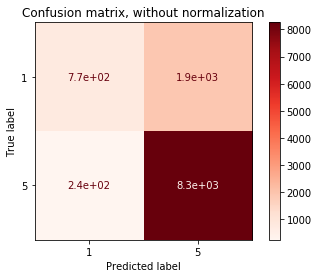

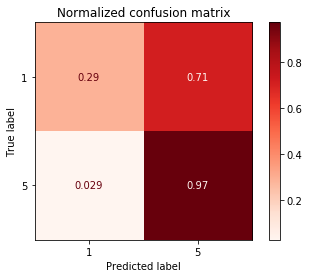

In [10]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(k_nn, X_test, y_test,
                                 #display_labels=review_class['stars'],
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()

In [11]:
#output report to a csv file in 'output files'
reportDf = pd.DataFrame(classification_report(y_test, k_nn_predict, output_dict=True)).transpose()

reportDf.to_csv(r'../output files/k_nn.csv', index = False)

print('Output written to k_nn.csv')

Output written to k_nn.csv
